<a href="https://colab.research.google.com/github/take2rohit/yolov4/blob/master/yolo_label_preporcessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset 
This notebook has been designed for fastest training for yoloV4 with least amount of changes required to done.

Changes that is to be done has been already written as `Change 1`, `Change 2`, etc.

1. Download dataset from OpenImage V4 using [OIDv4 toolkit](https://github.com/EscVM/OIDv4_ToolKit)
2. Mount your drive

*This code has been compiled by*
1. *Arihant Gaur - [website](https://flagarihant2000.github.io/arihantgaur/)*
2. *Rohit Lal - [website](http://take2rohit.github.io/)*

> **Change 1:** Change the path of zip file of dataset. The dataset consists of 1 folder `train` which consists folder of images as well as label


In [ ]:
%cd /content/
!unzip /content/drive/My\ Drive/number_plate/number_plate_yolo_openimage.zip

In [ ]:
import cv2,os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

> **Change 2:** Change the variables `img_dir` and `label_dir`


# Visualise sample data

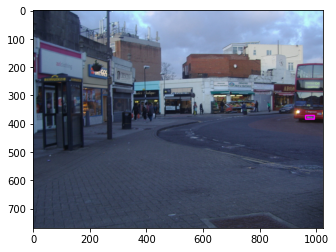

In [ ]:
img_dir = '/content/train/Vehicle registration plate'
label_dir = '/content/train/Label'
files = list(os.listdir(img_dir))

idx = np.random.randint(1,1000)
filename = files[idx]

rand_img_path = os.path.join(img_dir,filename)
abs_label_dir = os.path.join(label_dir,filename[:-3]+'txt')

img = cv2.imread(rand_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

with open(abs_label_dir, "r") as f:
    label = f.read()

label = label.strip().split()

x_top,y_top = int(float(label[3])),int(float(label[4]))
x_bottom,y_bottom = int(float(label[5])),int(float(label[6]))

img = cv2.rectangle(img,(x_top,y_top),(x_bottom,y_bottom),[255,0,255], 3)

plt.imshow(img)
plt.show()

img_h,img_w = img.shape[0], img.shape[1]

x_top_norm, y_top_norm  = x_top//img_w , y_top//img_h
x_bottom_norm, y_bottom_norm  = x_bottom//img_w , y_bottom//img_h

x_center_norm = (x_top_norm + x_bottom_norm) // 2
y_center_norm = (y_top_norm + y_bottom_norm) // 2

# Convert OpenImage Format to Yolo Format


Your yolo converted labels will be saved in an autogenerated folder named `yolo_labels`

In [ ]:
save_folder = '/content/train/yolo_labels'

if not os.path.exists(save_folder):
    os.mkdir(save_folder)

for filename in tqdm(os.listdir(img_dir), total=len(os.listdir(img_dir))):

    rand_img_path = os.path.join(img_dir,filename)
    abs_label_dir = os.path.join(label_dir,filename[:-3]+'txt')

    img = cv2.imread(rand_img_path)
    img_h,img_w = img.shape[0], img.shape[1]

    with open(abs_label_dir, "r") as f:
        label = f.read()

    label = label.strip().split()

    x_top,y_top = int(float(label[3])),int(float(label[4]))
    x_bottom,y_bottom = int(float(label[5])),int(float(label[6]))

    x_top_norm, y_top_norm  = x_top/img_w , y_top/img_h
    x_bottom_norm, y_bottom_norm  = x_bottom/img_w , y_bottom/img_h

    x_center_norm = (x_top_norm + x_bottom_norm) / 2
    y_center_norm = (y_top_norm + y_bottom_norm) / 2

    h = abs(x_top_norm-x_bottom_norm)  
    w = abs(y_top_norm-y_bottom_norm)

    with open(os.path.join(save_folder,filename[:-3]+'txt'), "w") as f:
        f.write(f'0 {x_center_norm} {y_center_norm} {w} {h}')